<a href="https://colab.research.google.com/github/MuhammadTalha-Ai/Exploratory-Data-Analysis-on-Titanic-Dataset/blob/main/Exploratory_Data_Analysis_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [26]:
# Specify the file within the dataset to load (usually "train.csv")
file_path = "train.csv"

# Load Titanic dataset directly into Pandas
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shuofxz/titanic-machine-learning-from-disaster",
    file_path,)

/tmp/ipython-input-3158423652.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [44]:
# View top records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
# Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 891, Columns: 12


In [29]:
# Info on datatypes and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,3.0,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,3.0,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,491.0,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,NaN,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,NaN,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


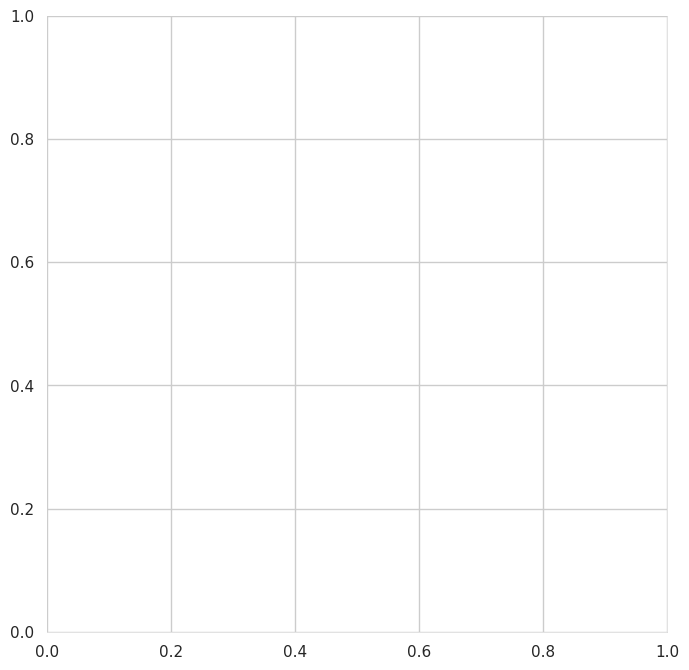

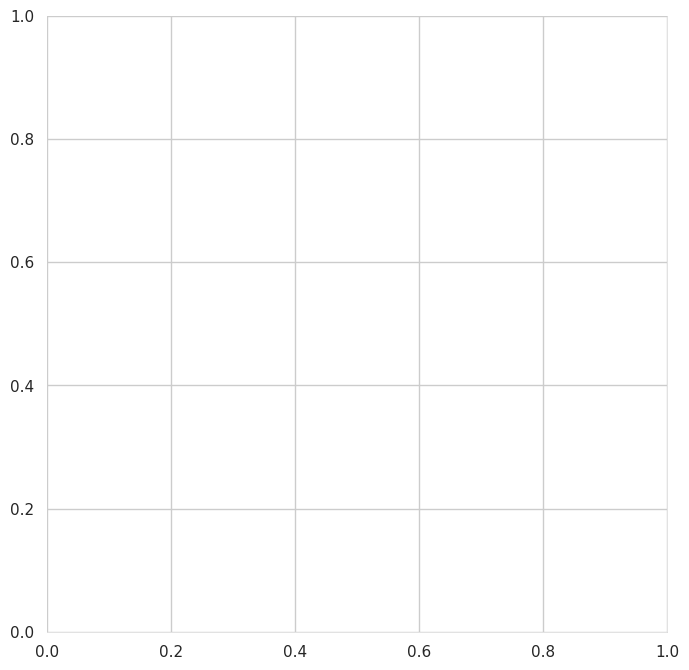

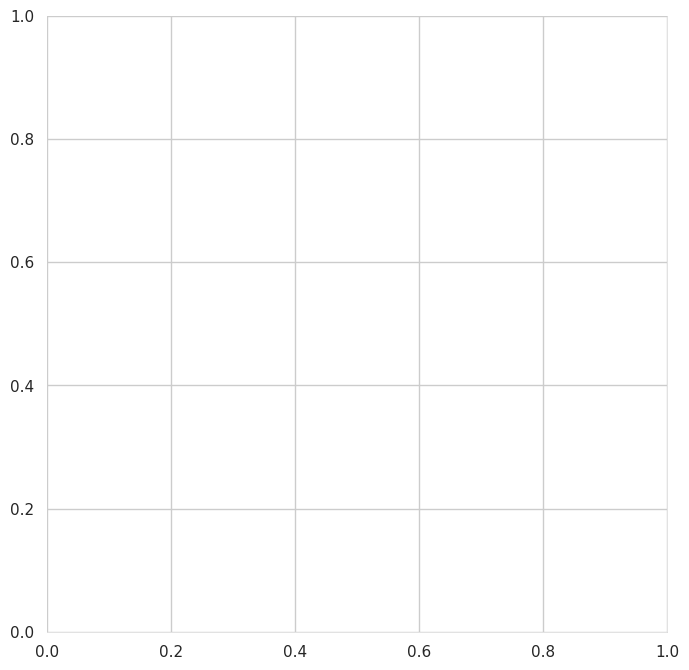

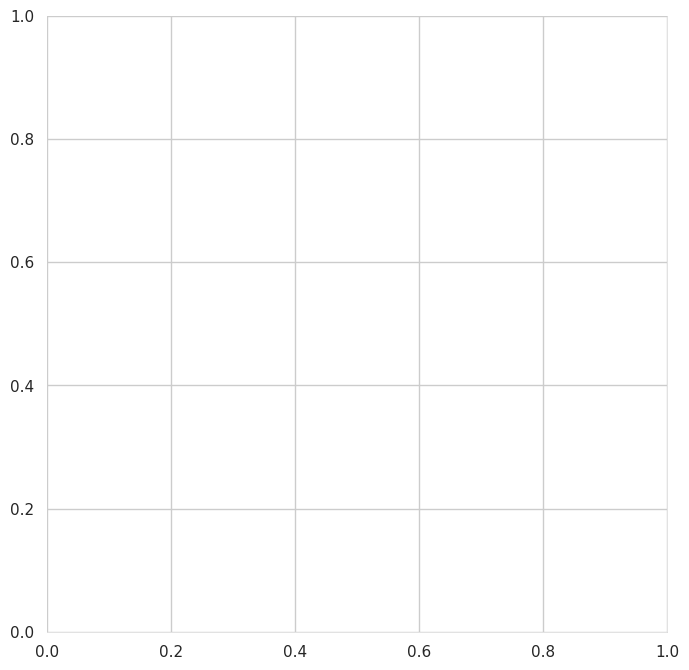

In [43]:
# Summary statistics
df.describe(include='all')


In [31]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [32]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin due to many nulls
df.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-4255667092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4255667092.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [33]:
# Convert to category type
df['Pclass'] = df['Pclass'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


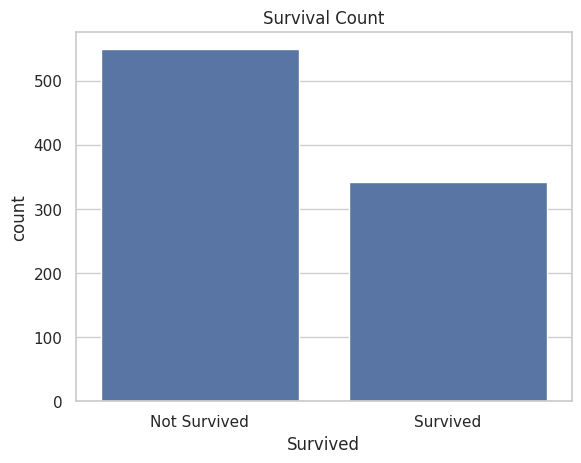

In [35]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.show()


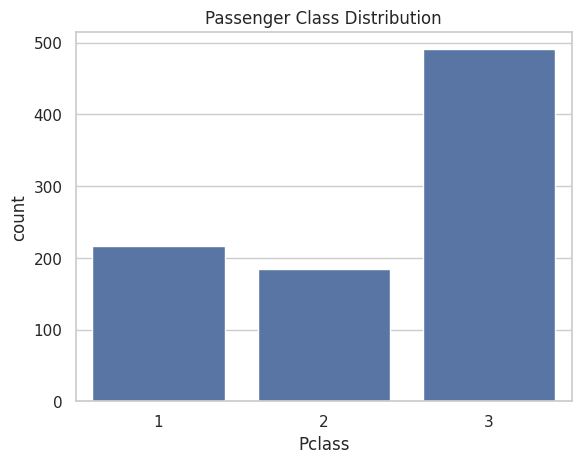

In [36]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()


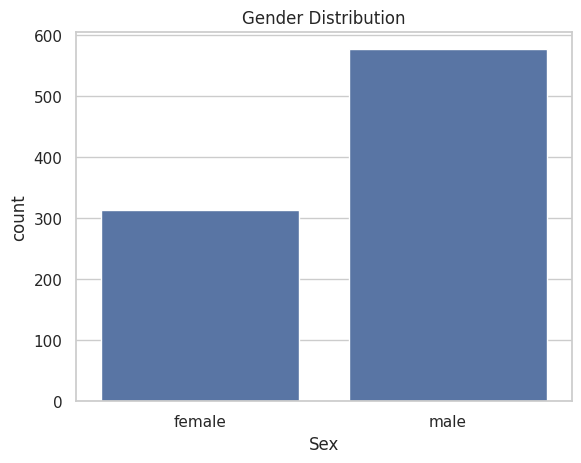

In [37]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()


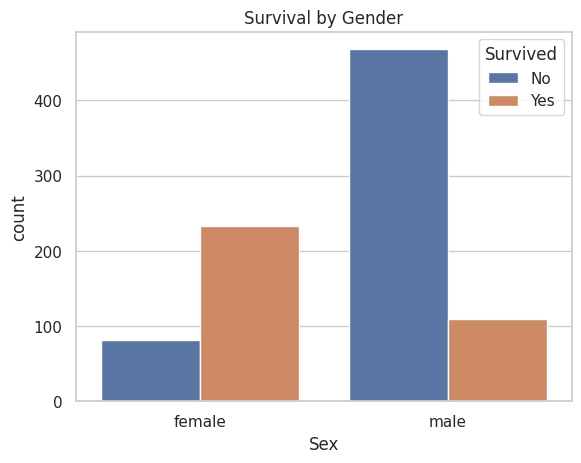

In [38]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


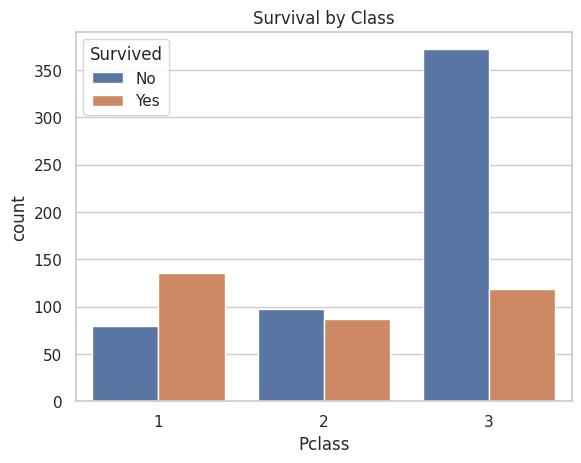

In [39]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


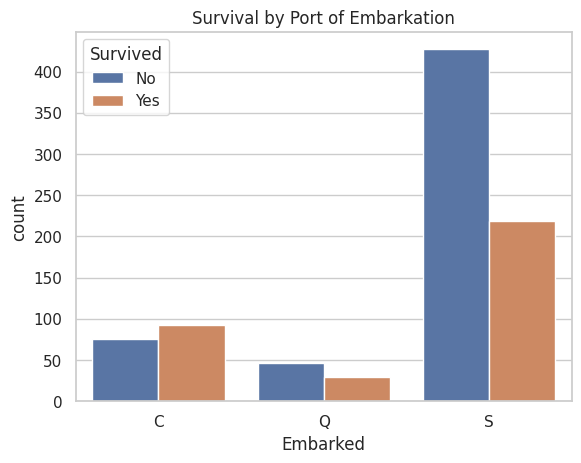

In [40]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Port of Embarkation')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [41]:
# Convert 'Survived' to int before calculating the mean
df['Survived'] = df['Survived'].astype(int)

# Survival rate by gender
print("Survival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by class
print("\nSurvival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean())

# Survival rate by gender and class
print("\nSurvival Rate by Gender and Class:")
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Gender and Class:
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


/tmp/ipython-input-2025544977.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sex')['Survived'].mean())
/tmp/ipython-input-2025544977.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())
/tmp/ipython-input-2025544977.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())


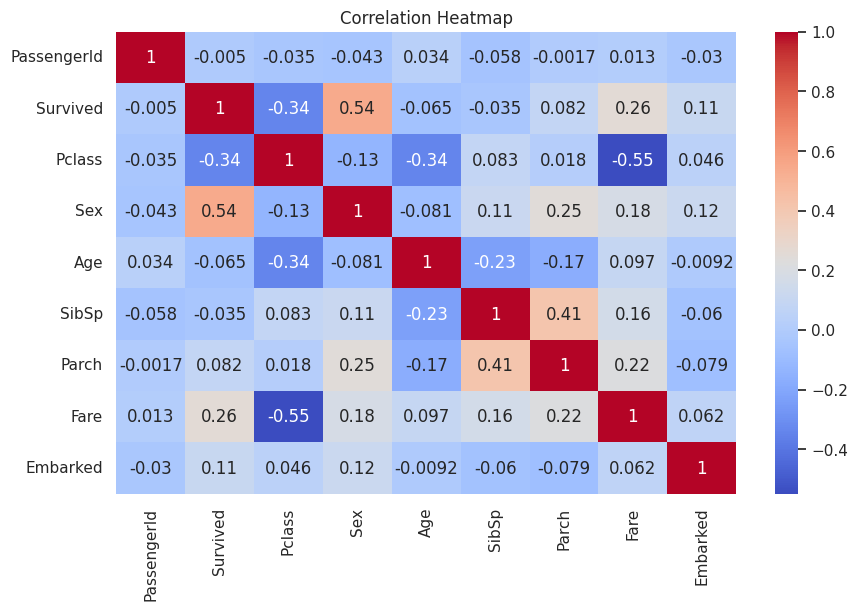

In [42]:
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_corr['Survived'] = df_corr['Survived'].astype(int)

# Drop non-numeric columns not relevant for correlation
df_corr = df_corr.drop(columns=['Name', 'Ticket'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 🚢 Titanic Dataset – Exploratory Data Analysis (EDA) Report

## 📁 Dataset Overview

**Source**: [Kaggle – Titanic: Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/)  
**Description**: Classic binary classification dataset where the goal is to predict survival based on passenger attributes.

---

## 🧾 1. Initial Data Exploration

- **Rows**: 891  
- **Columns**: 12  
- **Target variable**: `Survived` (0 = No, 1 = Yes)

### 🔍 Data Preview

| PassengerId | Survived | Pclass | Name | Sex | Age | SibSp | Parch | Ticket | Fare | Cabin | Embarked |
|-------------|----------|--------|------|-----|-----|--------|--------|--------|------|--------|----------|

### 📊 Data Types and Missing Values

- `Age`: 177 missing values  
- `Cabin`: 687 missing (dropped)  
- `Embarked`: 2 missing values

---

## 🧹 2. Data Cleaning

- `Age`: Filled with median  
- `Embarked`: Filled with mode  
- `Cabin`: Dropped due to excessive missing values  
- Categorical conversion applied to:
  - `Pclass`, `Survived`, `Sex`, `Embarked`

---

## 📊 3. Univariate Analysis

### 🎯 Survival Distribution
- ~38% Survived, ~62% Did not survive

### 🛳 Passenger Class Distribution
- Class 3 had the most passengers
- Class 1 had the least

### 🙋 Gender Distribution
- Male passengers: 65%
- Female passengers: 35%

---

## 🔁 4. Bivariate Analysis

### 👩‍🦰 Survival by Gender

- **Females**: ~74% survival  
- **Males**: ~19% survival

### 💼 Survival by Passenger Class

- **Class 1**: ~63% survived  
- **Class 2**: ~47% survived  
- **Class 3**: ~24% survived

### ⚓ Survival by Embarked Port

- **Cherbourg (C)** passengers had highest survival  
- **Southampton (S)** passengers had the lowest

---

## 🧮 5. Group-Based Insights

### 📌 Survival Rate by Gender
```
female: 0.74
male:   0.19
```

### 📌 Survival Rate by Class
```
1st Class: 0.63
2nd Class: 0.47
3rd Class: 0.24
```

### 📌 Survival Rate by Gender and Class
```
female, 1st: 0.97
female, 2nd: 0.92
female, 3rd: 0.50

male, 1st: 0.37
male, 2nd: 0.15
male, 3rd: 0.13
```

---

## 🔥 6. Correlation Heatmap (Numerical Features)

| Feature        | Correlation with Survived |
|----------------|----------------------------|
| Sex (female)   | **+0.54**                  |
| Pclass         | **–0.34**                  |
| Fare           | +0.26                      |
| Age            | –0.08                      |

**Interpretation**:  
Being **female**, in a **higher class**, or paying a **higher fare** increased survival chances.  
**Age** showed weak correlation but can be helpful when combined with class or gender.

---

## ✅ 7. Conclusion & Insights

- **Gender is the strongest predictor**: females had a much higher survival rate.
- **1st class passengers** had the highest survival.
- **Cherbourg embarkation** and **higher fare** values were also associated with better survival.
- **Age** had weak correlation but may still be useful in combination with other features.

---
